In [1]:
import geopandas as gpd
import pandas as pd
from shapely import wkb
import mapclassify
import contextily as cx
import matplotlib.pyplot as plt
import overlap

In [16]:
run = 'grotsund_arp_12h-max4800_grid_toteffout_bitmp_Adults_Total_sheltering_full_full.pkl'
df=pd.read_pickle(run)

In [4]:
df.head(1)

,index,FeatureId,ObjectID,LayerID,IntPolVal,Value,ItemName,Time,Endpoint,AgeGroup,Unit,ValueStr,Color,geom_str
0,0,0.0,ForecastSvc,Rimpuff,3442.0,0,Total,03/28/20 01:00,Total Effective Dose. Outdoor,Adults,Sv,5.436279e-016,"(53,159,255)",b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
1,1,1.0,ForecastSvc,Rimpuff,4397.0,0,None,None,None,None,None,8.695907e-016,"(42,176,255)",b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
2,2,2.0,ForecastSvc,Rimpuff,5852.0,0,None,None,None,None,None,1.778857e-015,"(28,202,255)",b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
3,3,3.0,ForecastSvc,Rimpuff,7137.0,0,None,None,None,None,None,3.346963e-015,"(17,225,255)",b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
4,4,4.0,ForecastSvc,Rimpuff,8192.0,0,None,None,None,None,None,5.623759e-015,"(10,243,255)","b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00..."


In [5]:
df2=df.groupby('geom_str').agg({'Value': 'max'})
df2.reset_index(inplace=True)
df2.head(1)

,geom_str,Value
0,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,0
1,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,0
2,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,0
3,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,0
4,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,0


In [6]:
gdf = gpd.GeoDataFrame(df2)

gdf['geometry'] = gdf['geom_str'].apply(wkb.loads)

gdf.head(1)

,geom_str,Value,geometry
0,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,0,"POLYGON ((20.29688 69.81733, 20.30986 69.81738..."
1,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,0,"POLYGON ((19.39063 69.60957, 19.40348 69.60969..."
2,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...,0,"POLYGON ((19.50000 69.70024, 19.51291 69.70035..."


In [7]:
# gdf.plot(column='Value', cmap='OrRd', scheme='quantiles')


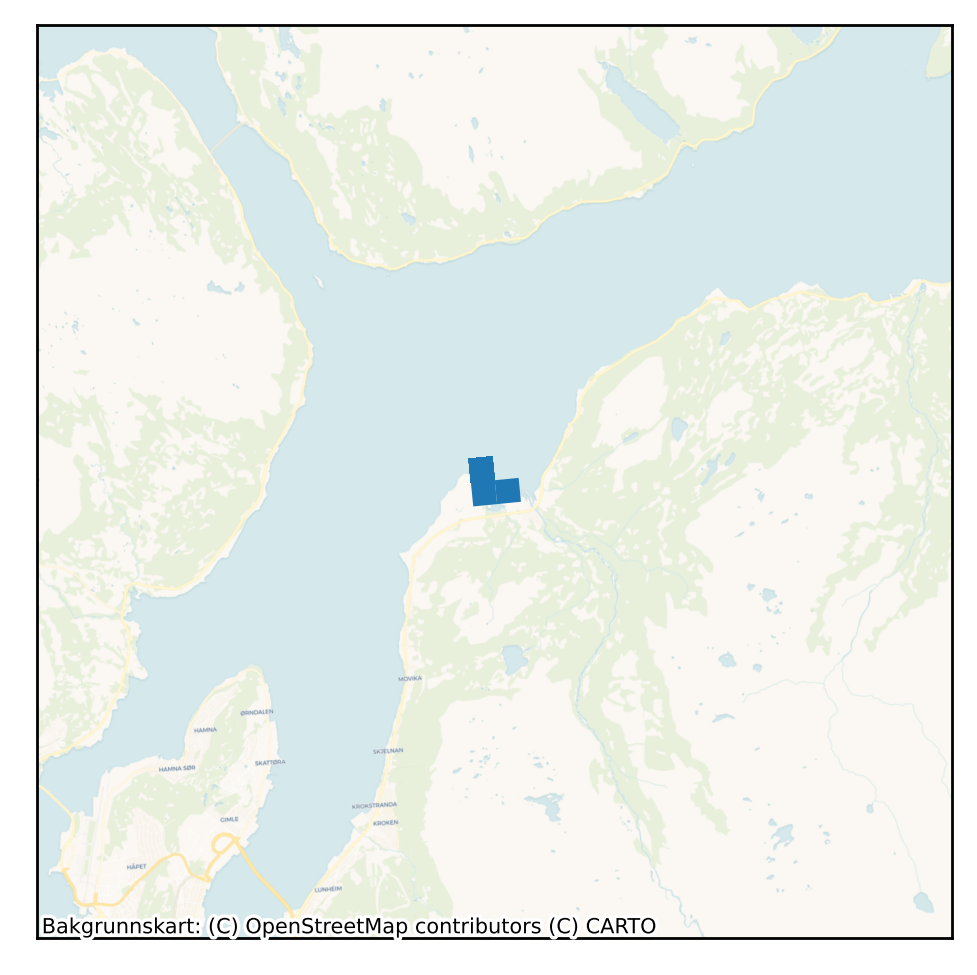

In [12]:
fig, ax = plt.subplots(dpi=250)  # figsize=(10, 10))

gdf_out = gdf[gdf.Value > 0]

gdf_out = gdf_out.set_crs('EPSG:4326')

gdf_out.to_crs('EPSG:25833', inplace=True)

gdf_out.plot(ax=ax)

#gdf.boundary.plot(ax=ax)  # column='value', alpha=.3)#, cmap=plt.cm.Wistia)
# overlap.tromso_area.to_crs('EPSG:25833').plot(ax=ax, alpha=0)
minx, miny, maxx, maxy = gdf_out.geometry.total_bounds

padding_m = 9000
ax.set_xlim(minx - padding_m, maxx + padding_m)
ax.set_ylim(miny - padding_m, maxy + padding_m)

basemap = cx.providers.CartoDB.Voyager
#basemap = cx.providers.Stamen.Terrain
cx.add_basemap(ax, crs="EPSG:25833", source=basemap,
               attribution=f"Bakgrunnskart: {basemap.attribution}", attribution_size=6)



# ax.set_title(ds2.attrs['title'])
ax.set_xlabel('')
ax.set_ylabel('')

ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.tight_layout()
fig.savefig(f"{run}.png")

In [3]:
run = 'grotsund_arp_12h-max16800_grid_toteffout_bitmp_Adults_Total_evac_full.pkl'
df=pd.read_pickle(run)

In [4]:
df.head()

,index,Value,geom_str
0,0,5.436279e-16,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
1,1,8.695907e-16,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
2,2,1.778857e-15,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
3,3,3.346963e-15,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00...
4,4,5.623759e-15,"b""\x01\x03\x00\x00\x00\x01\x00\x00\x00\x05\x00..."


<AxesSubplot:>

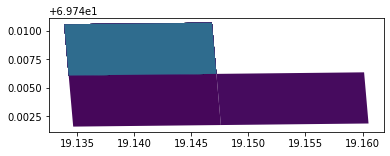

In [5]:
# Evakuering - debugging
crit = 20/1000
df2= df[df.Value > crit]

gdf = gpd.GeoDataFrame(df2)

gdf['geometry'] = gdf['geom_str'].apply(wkb.loads)
gdf.plot(column='Value')